# CNN TP1

- MNIST dataset
- Comparer DNN (MLP de sklearn) et CNN ("Sequential" de Keras).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata("MNIST original")

In [2]:
X, Y = mnist.data / 255.0, mnist.target

In [3]:
print("X shape", X.shape)
print("Y", Y.shape)
print("image size:", int(np.sqrt(784)))

X shape (70000, 784)
Y (70000,)
image size: 28


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    shuffle=True,
    test_size=0.3
)

print("train shape", X_train.shape)
print("train", X_train.shape[0])
print("test", X_test.shape[0])

train shape (49000, 784)
train 49000
test 21000


In [5]:
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [6]:
clfs = [
    ("GaussianNB", GaussianNB()),
    ("MultinomialNB", MultinomialNB()),
    # ("SVM rbf", SVC(kernel="rbf")),
    ("SVM linear", LinearSVC()),
    # ("kNN 3", KNeighborsClassifier(n_neighbors=3)),
    ("MLP SGD 20", MLPClassifier(hidden_layer_sizes=(20,), activation="relu",solver="sgd")),
    # ("MLP Adam 20", MLPClassifier(hidden_layer_sizes=(20,), activation="relu",solver="adam")),
]

for name, clf in clfs:
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    score_train = clf.score(X_train, Y_train)
    print(f"{name:20} score = {score}, {score_train}")

GaussianNB           score = 0.5477142857142857, 0.5486530612244898
GaussianNB           score = 0.8221904761904761, 0.8265714285714286
SVM linear           score = 0.9098571428571428, 0.9299795918367347


/home/jbjuin/.local/share/virtualenvs/cours-pWOZq47j/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP SGD 20           score = 0.9498095238095238, 0.9596326530612245


(784,)


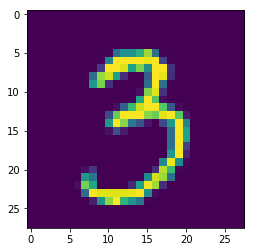

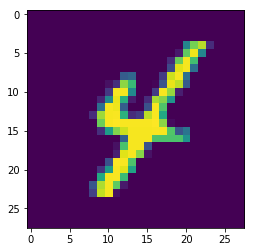

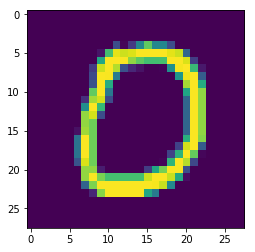

In [9]:
print(X[0, :].shape)
plt.imshow(X[20000, :].reshape(28,28))
plt.show()
plt.imshow(X[30001, :].reshape(28,28))
plt.show()
plt.imshow(X[60001, :].reshape(28,28))
plt.show()


In [11]:
img_rows, img_cols = 28, 28
batch_size = 1
num_channels = 1
data_format = "channels_last"
input_shape = (img_rows, img_cols, num_channels)
num_classes = 10

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    shuffle=True,
    test_size=0.3
)

print("train shape", X_train.shape)
print("train", X_train.shape[0])
print("test", X_test.shape[0])

train shape (49000, 784)
train 49000
test 21000


In [32]:
# X_train_copy = np.copy(X_train)
# X_test_copy = np.copy(X_test)
# Y_train_copy = np.copy(Y_train)
# Y_test_copy = np.copy(Y_test)

# on reforme les données en array 2D et non plus en 1D
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, num_channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, num_channels)
print(X_test.shape, X_train.shape)

# on reshare les sorties qui sont les chiffres: 0, 1...9
# en vecteur binaire de longueur 10:
# 0 -> 1 0 0 0 0 0 0 0 0 0 
# 1 -> 0 1 0 0 0 0 0 0 0 0
# etc.
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

(21000, 28, 28, 1) (49000, 28, 28, 1)


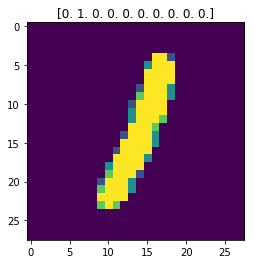

In [36]:
plt.figure()
plt.imshow(X_train[0,:,:,0])
plt.title(Y_train[0, :])
plt.show()

In [48]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten

# KERAS CNN: 
input_layer = Conv2D(filters=32, 
                     kernel_size=(3, 3), 
                     input_shape=input_shape, 
                     data_format=data_format, 
                     padding="same",
                     activation="relu")
model = Sequential()
model.add(input_layer)
# image 28x28
model.add(MaxPooling2D(pool_size=(2, 2)))
# image 14x14
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=input_shape, activation="relu", padding="same"))
# image 14x14
model.add(MaxPooling2D(pool_size=(2, 2)))
# image 7x7
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print("done")

done


In [49]:
print("start compile")
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=sgd,
              metrics=['mae'])
print("done")

start compile
done


In [50]:
print(X_test.shape)
print(Y_test.shape)
print("start fit")
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=1,
          verbose=1,
          validation_data=(X_test, Y_test))
print("done")

(21000, 28, 28, 1)
(21000, 10)
start fit
Train on 49000 samples, validate on 21000 samples
Epoch 1/1
49000/49000 [==============================] - 630s 13ms/step - loss: 0.0101 - mean_absolute_error: 0.0207 - val_loss: 0.0042 - val_mean_absolute_error: 0.0091
done


## Visu

Pour visualiser les filtres: 

https://raghakot.github.io/keras-vis/

```
pip install keras-vis
```

In [51]:
Y_predicted = model.predict(X_test)
score = np.mean(Y_predicted.argmax(axis=1) == Y_test.argmax(axis=1))
print("score", score)
Y_train_predicted = model.predict(X_train)
score_train = np.mean(Y_train_predicted.argmax(axis=1) == Y_train.argmax(axis=1))
print("score train", score_train)

score 0.9736666666666667
score train 0.9774489795918367


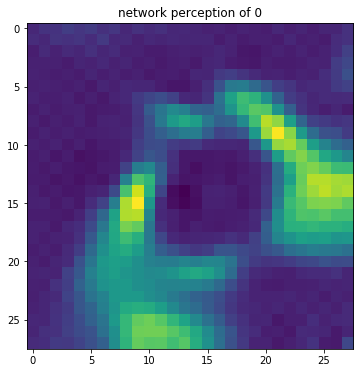

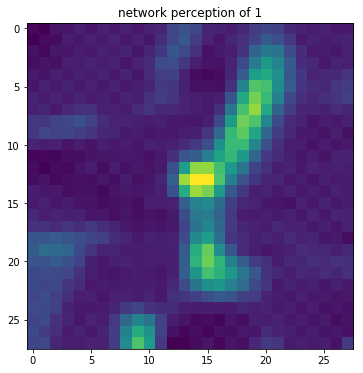

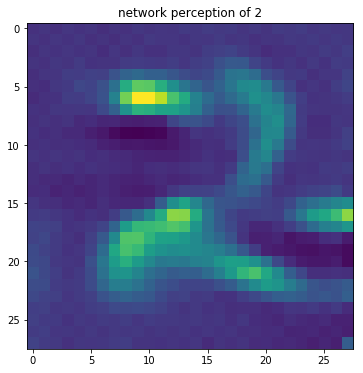

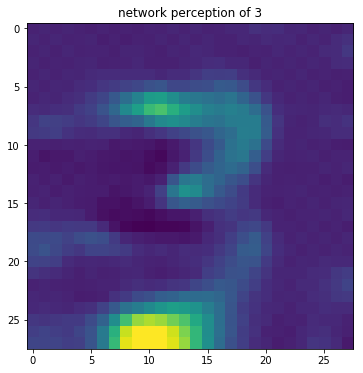

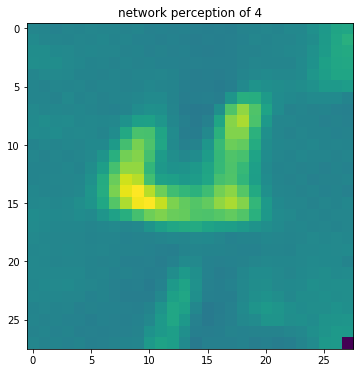

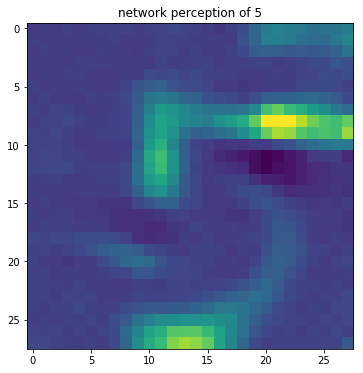

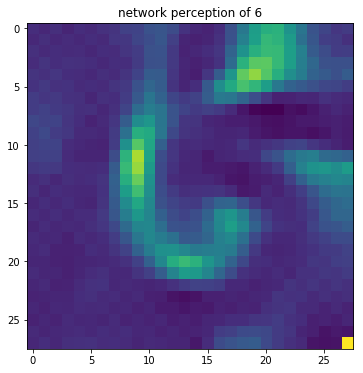

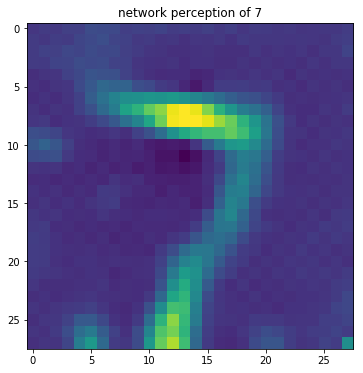

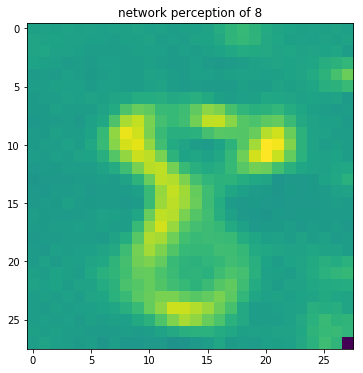

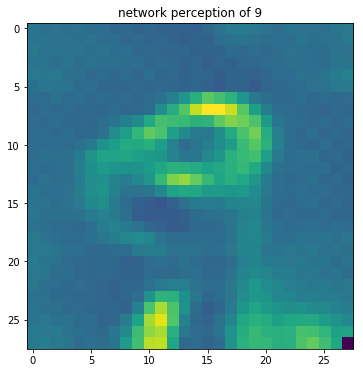

In [57]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6)

layer_idx = -1

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# This is the output node we want to maximize.
for i in range(10):
    filter_idx = i
    plt.figure()
    img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0.0, 1.0))
    plt.imshow(img[..., 0])
    plt.title("network perception of %s"%i)
    plt.show()

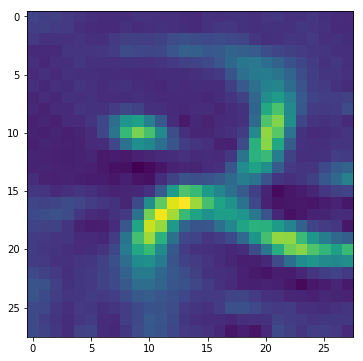

In [72]:
# on génére une image qui synthétise comment le réseau percoit les chiffres 2, 3 et 8
img = visualize_activation(model, layer_idx, filter_indices=[2, 8, 4], input_range=(0.0, 1.0))
plt.imshow(img[..., 0])

In [71]:
# on rescale entre 0 et 1
img = (img - img.min())/(img.max() - img.min())
print(img.max(), img.min())
# on fait prédire sur l'image les classes
model.predict(img.reshape(1,28,28,1))

1.0 0.0


array([[ 3.727883  ,  0.39462972,  9.856383  ,  3.6554954 , -4.5984206 ,
        -2.101457  , -2.0546775 ,  4.521547  ,  4.9353075 , -2.808236  ]],
      dtype=float32)